# NAMA : Ashraf Pratama
# NIM : 09011381722093
# KELAS : SK5A
# MATA KULIAH : Actificial Intilegence

### Predicting Pulsa Star ###
Dr Robert Lyon

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder # ngubah categori ke angka
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.mMemanggil Fungsi atau kelas.

Using TensorFlow backend.


### Berikut adalah Daftar-daftar Modul yang digunakan:

## Numpy
- untuk melakukan beberapa fungsi matematika seperti array, dan matriks.Pada progam ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks.

## Matplotlib
- untuk mencetak grafik di berbagai event seperti grafik distribusi variabel, grafik confusion matrix,grafik akurasi, dan yang lainnya.

## Keras
- untuk membuat, menambah, dan mengevaluasi model neural network.

## Sklearn
- merupakan salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya.
Memasukkan dataset yang akan digunakan
Informasi dataset
Dataset dapat didownload padautama yang digunakan untuk mengolah data Machine          Learning seperti preprocessing, dan lainnya.

In [2]:
df = pd.read_csv ('D:/FILE KULIAH/Semester 5/AI/predicting-a-pulsar-star/pulsar_stars.csv', sep=',') 

Digunakan untuk load dataset dengan nama "predicting-a-pulsar-star/pulsar_stars.csv".

In [3]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,targetclass
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## informasi Atribut yang digunakan:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1.Mean of the integrated profile.
2.Standard deviation of the integrated profile.
3.Excess kurtosis of the integrated profile.
4.Skewness of the integrated profile.
5.Mean of the DM-SNR curve.
6.Standard deviation of the DM-SNR curve.
7.Excess kurtosis of the DM-SNR curve.
8.Skewness of the DM-SNR curve.
9.Class
HTRU 2 Summary
17,898 total examples.
1,639 positive examples.
16,259 negative examples.

Source: https://archive.ics.uci.edu/ml/datasets/HTRU2

- Dr Robert Lyon
- University of Manchester
- School of Physics and Astronomy
- Alan Turing Building
- Manchester M13 9PL
- United Kingdom
- robert.lyon '@' manchester.ac.uk

In [4]:
df.shape

(17898, 9)

In [5]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(df)
feature_scaled.shape

(17898, 9)

In [6]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,targetclass
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
x= df.iloc[:,:8].values
y = df.iloc[:,8].values

In [8]:
np.unique(y)

array([0, 1], dtype=int64)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=2)

In [10]:
model = Sequential()
model.add(Dense(units= 100, input_dim =8 , activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [11]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

## Proses Training

In [12]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=16, 
                         epochs=10)

Train on 16108 samples, validate on 1790 samples
Epoch 1/10
16108/16108 [==============================] - 3s 180us/step - loss: 0.2006 - accuracy: 0.9511 - val_loss: 0.0928 - val_accuracy: 0.9771
Epoch 2/10
16108/16108 [==============================] - 4s 235us/step - loss: 0.0954 - accuracy: 0.9718 - val_loss: 0.0952 - val_accuracy: 0.9782
Epoch 3/10
16108/16108 [==============================] - 5s 290us/step - loss: 0.0906 - accuracy: 0.9742 - val_loss: 0.0930 - val_accuracy: 0.9743
Epoch 4/10
16108/16108 [==============================] - 5s 282us/step - loss: 0.0895 - accuracy: 0.9748 - val_loss: 0.1010 - val_accuracy: 0.9760
Epoch 5/10
16108/16108 [==============================] - 4s 235us/step - loss: 0.0899 - accuracy: 0.9738 - val_loss: 0.0929 - val_accuracy: 0.9782
Epoch 6/10
16108/16108 [==============================] - 4s 254us/step - loss: 0.0893 - accuracy: 0.9750 - val_loss: 0.0990 - val_accuracy: 0.9765
Epoch 7/10
16108/16108 [==============================] - 5s 28

In [13]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

1790/1790 [==============================] - 0s 28us/step


[0.08971126681433043, 0.978212296962738]

# Grafik Dataset

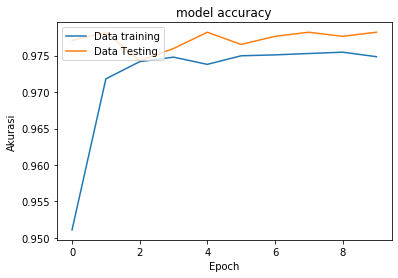

In [14]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

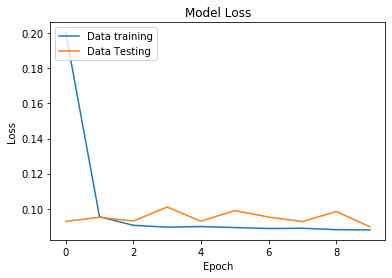

In [15]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [18]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[1613   11]
 [  28  138]]


In [19]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [20]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9932266009852216
recall :  0.9829372333942717
F1 :  0.9880551301684533
sensitivity :  0.9829372333942717
akurasi :  0.9782122905027933
